<a href="https://colab.research.google.com/github/ilaria-carnevale/ai_engineering_professionai/blob/main/Modulo4_MachineLearning_Advanced/Classificazione_di_frutti_esotici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Progetto Modulo 4 - Algoritmi di Machine Learning
##Classificazione di frutti esotici

TropicTaste Inc., leader nella distribuzione di frutti esotici, intende migliorare l'efficienza e l'accuratezza nel processo di classificazione dei frutti. L'obiettivo è sviluppare un modello di machine learning in grado di predire il tipo di frutto basandosi su caratteristiche numeriche.

L'attuale processo di classificazione dei frutti esotici è manuale e soggetto a errori, risultando inefficiente e dispendioso in termini di risorse. La necessità di un sistema automatizzato e preciso è cruciale per ottimizzare le operazioni aziendali e mantenere alti standard qualitativi.

Implementando un modello di classificazione automatizzato, TropicTaste Inc. potrà:
* **Migliorare l'Efficienza Operativa**: Automatizzare la classificazione ridurrà il tempo e le risorse necessarie, aumentando la produttività.
* **Ridurre gli Errori Umani**: Un modello di machine learning minimizzerà gli errori di classificazione, garantendo una maggiore precisione.
* **Ottimizzare l'Inventario**: Una classificazione accurata permetterà una migliore gestione dell'inventario, assicurando condizioni ottimali di conservazione per ogni tipo di frutto.
* **Aumentare la Soddisfazione del Cliente**: Una corretta identificazione e classificazione dei frutti contribuirà a mantenere elevati standard di qualità, migliorando la soddisfazione dei clienti.
</br></br>

**Dettagli del Progetto**:
1. **Dataset**: Utilizzo di un dataset contenente varie caratteristiche numeriche di diversi frutti esotici.
2. **Algoritmo**: Implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la classificazione.
3. **Output**: Il modello deve predire correttamente il tipo di frutto basandosi sui dati forniti.
</br></br>

**Requisiti del Progetto**:
</br></br>

1. **Preparazione del Dataset**:
> * Caricamento e preprocessamento dei dati sui frutti esotici.
> * Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.

2. **Implementazione del Modello KNN**:
> * Sviluppo e addestramento del modello KNN.
> * Ottimizzazione dei parametri per migliorare l'accuratezza predittiva.

3. **Valutazione delle Performance**:
> * Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
> * Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.

4. **Visualizzazione dei Risultati**:
> * Creazione di grafici per visualizzare e confrontare le performance del modello.
> * Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.
</br></br>

**Variabili del Dataset**
Il dataset è scaricabile da qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv

Contiene le seguenti variabili:
> * **Frutto**: Il tipo di frutto. Questa è la variabile di destinazione (target) che vogliamo prevedere.
> * **Peso (g)**: Il peso del frutto in grammi. Variabile continua.
> * **Diametro medio (mm)**: Il diametro medio del frutto in millimetri. Variabile continua.
> * **Lunghezza media (mm)**: La lunghezza media del frutto in millimetri. Variabile continua.
> * **Durezza buccia (1-10)**: La durezza della buccia del frutto su una scala da 1 a 10. Variabile continua.
> * **Dolcezza (1-10)**: La dolcezza del frutto su una scala da 1 a 10. Variabile continua.

Ricorda di eseguire una corretta analisi esplorativa del dataset prima di procedere con il modello. Ricordati anche di applicare il corretto preprocessing ai dati e di misurare le performance del modello secondo le metriche che ritieni più utili.

Accompagna ogni passo dell’analisi con grafici appropriati e commenta adeguatamente ogni passaggio, estraendo degli insight utili all’analisi e alla comprensione dell’informazione trasmessa dal dato.



# <font color= "#B8633C"> Installazione moduli e librerie </font>

Vengono importate le librerie Python utilizzate per l’analisi dei dati, la costruzione del modello KNN e la visualizzazione dei risultati:
* `pandas`: per la manipolazione e l’analisi di dati strutturati in DataFrame;
* `numpy`: per operazioni numeriche su array e gestione di dati numerici;
* `matplotlib.pyplot`: per la creazione di grafici e visualizzazioni di dati;
* `seaborn`: libreria basata su matplotlib per visualizzazioni statistiche;
* `sklearn.model_selection.train_test_split`: per suddividere il dataset in training e test set;
* `sklearn.preprocessing.StandardScaler`: per la standardizzazione delle feature numeriche;
* `sklearn.neighbors.KNeighborsClassifier`: per istanziare il modello di classificazione K-Nearest Neighbors;
* `sklearn.metrics`: per calcolare le metriche di valutazione del modello (accuratezza, log loss, classification report, matrice di confusione).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

# <font color= "#B8633C"> Caricamento e analisi dati (EDA)</font>

##<font color= "#B8633C"> Caricamento dei dati </font>

Per importare il dataset viene utilizzata la libreria Pandas, per caricare il file CSV da un URL remoto. Il dataset viene letto tramite il metodo `read_csv()` e memorizzato in un DataFrame.  

Dopo il caricamento, viene utilizzato il metodo `head()` per visualizzare le prime 5 righe del dataset, ottenendo una panoramica iniziale sulla struttura dei dati e sulla corretta importazione.  

Successivamente vengono utilizzati i metodi `info()` e `describe()` per ottenere informazioni sul tipo di dato per ciascuna variabile e sulla loro distribuzione statistica. Questo passaggio è utile per comprendere le caratteristiche del dataset prima di procedere con ulteriori fasi di analisi e preprocessing.

Dal codice otteniamo le seguenti informazioni:

* il dataset è composto da 500 osservazioni e 6 colonne;
* la variabile target `Frutto` è di tipo categorico (`object`);
* le altre 5 variabili sono numeriche (`float64`);
* non sono presenti valori nulli;
* le feature numeriche presentano scale molto diverse.


In [ ]:
#url contenete il dataset fruits.csv
DATASET = "https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv"
#leggiamo il dataset con pandas
fruits = pd.read_csv(DATASET)
#mostriamo i primi 10 risultati con pandas
fruits.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [ ]:
#verifichiamo la tipologia di ogni variabile
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
#verifichiamo la distribuzione delle variabili tramite analisi statistica
fruits.describe()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


## <font color= "#B8633C"> Distribuzione della variabile target </font>



Per analizzare la variabile target `Frutto`, viene utilizzato il metodo `value_counts()`, che restituisce il numero di occorrenze per ciascuna categoria presente nella colonna.  

Il risultato viene visualizzato tramite un grafico a barre con `plot(kind="bar")`, e completato con le funzioni `plt.title()`, `plt.xlabel()` e `plt.ylabel()` per aggiungere titolo e etichette agli assi. Il grafico viene infine mostrato tramite `plt.show()`.

Il grafico ottenuto conferma che tutte le classi (`Mela`, `Banana`, `Arancia`, `Uva`, `Kiwi`) sono perfettamente bilanciate con 100 osservazioni ciascuna.
Questa condizione è ideale per addestrare un classificatore come il KNN, poiché non è necessario applicare tecniche di bilanciamento o pesatura delle classi.

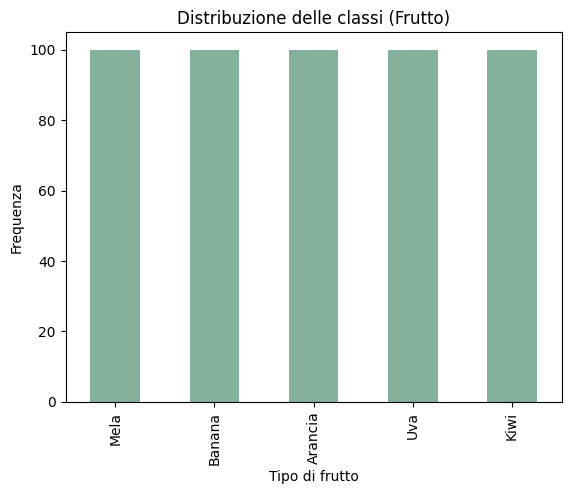

In [ ]:
#visualizziamo la distribuzione delle classi nella variabile target
fruits["Frutto"].value_counts().plot(kind="bar", color="#84B19C")

#aggiungiamo etichette e titolo
plt.title("Distribuzione delle classi (Frutto)")
plt.xlabel("Tipo di frutto")
plt.ylabel("Frequenza")
plt.show()

## <font color= "#B8633C"> Boxplot delle variabili numeriche </font>

Per analizzare la distribuzione delle variabili numeriche, viene utilizzata la funzione `sns.boxplot()` all’interno di un ciclo `for`.  
La figura complessiva viene impostata tramite `plt.figure(figsize=(15, 8))`.  
Per ciascuna colonna numerica del dataset viene creato un sottoplot con `plt.subplot()` e disegnato un boxplot con `sns.boxplot()`, specificando il colore e il nome della variabile.

I titoli dei grafici vengono aggiunti con `plt.title()`, la disposizione degli elementi viene ottimizzata con `plt.tight_layout()`, e infine tutti i grafici vengono mostrati con `plt.show()`.

Il risultato è una griglia di boxplot che mostra chiaramente che alcune variabili come `Peso (g)` e `Diametro medio (mm)` hanno una distribuzione molto ampia e asimmetrica, mentre variabili come `Dolcezza` e `Durezza buccia` presentano range più contenuti. Sono presenti alcuni outlier, coerenti con la variabilità dei frutti. Questa visualizzazione conferma la necessità di applicare una standardizzazione per rendere confrontabili tutte le variabili prima dell’addestramento del modello.


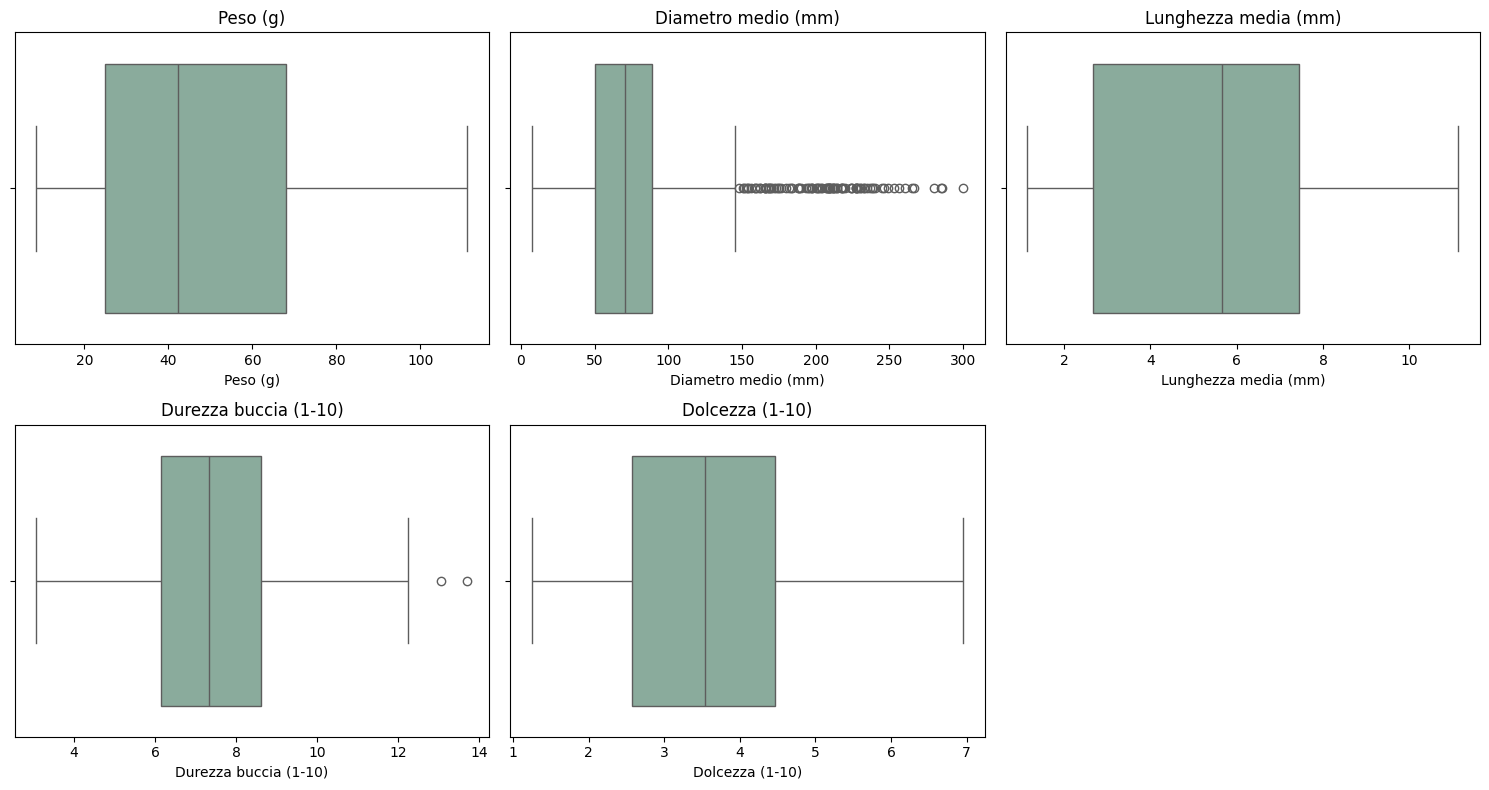

In [ ]:
#impostiamo dimensioni della figura
plt.figure(figsize=(15, 8))

#iteriamo sulle colonne per creare i boxplot
for i, col in enumerate(fruits.select_dtypes(include=np.number).columns):
    #creiamo subplot per ogni feature
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=fruits, x=col, color="#84B19C")
    plt.title(f"{col}")

#visualizziamo tutti i plot
plt.tight_layout()
plt.show()

#<font color= "#B8633C">Preprocessing </font>

## <font color= "#B8633C"> Verifica dei valori mancanti </font>

Per verificare la completezza del dataset, vengono eseguite tre istruzioni:

* `fruits.shape` restituisce una tupla con il numero di righe e colonne del dataset (500, 6);
* `fruits.count()` restituisce il numero di valori non nulli per ciascuna colonna;
* `fruits.isna().sum()` calcola il numero di valori nulli per colonna combinando i metodi `isna()` e `sum()`.

Tutti i risultati vengono stampati con la funzione `print()` per fornire una panoramica chiara della struttura e dell'integrità del dataset.

Il risultato ottenuto conferma che il dataset non contiene valori nulli: tutte le colonne contengono 500 valori validi. Non è quindi necessario applicare operazioni di completamento o esclusione dei dati.


In [ ]:
#conteggio dimensione dei dati (righe e colonne)
print(f"Dimensione dei dati in righe/colonne: {fruits.shape}")
print("=================================================")

#conteggio per valori validi
print(f"Valori validi del dataset:\n{fruits.count()}\n")
print("=================================================")

#conteggio dei valori mancanti
print(f"Valori mancanti del dataset:\n{fruits.isna()}\n") #True se Na=mancante
#conteggio dimensione valori mancanti (+1 per ogni Na)
print("=================================================")
print(f"Totale valori mancanti:\n{fruits.isna().sum()}")

Dimensione dei dati in righe/colonne: (500, 6)
Valori validi del dataset:
Frutto                   500
Peso (g)                 500
Diametro medio (mm)      500
Lunghezza media (mm)     500
Durezza buccia (1-10)    500
Dolcezza (1-10)          500
dtype: int64

Valori mancanti del dataset:
     Frutto  Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
0     False     False                False                 False   
1     False     False                False                 False   
2     False     False                False                 False   
3     False     False                False                 False   
4     False     False                False                 False   
..      ...       ...                  ...                   ...   
495   False     False                False                 False   
496   False     False                False                 False   
497   False     False                False                 False   
498   False     False        

## <font color= "#B8633C"> Separazione delle variabili </font>

Per preparare correttamente i dati per l'addestramento del modello di classificazione, viene separata la variabile target `Frutto` dalle variabili indipendenti.  

La variabile target viene salvata nella variabile `y`, mentre le cinque feature numeriche (`Peso (g)`, `Diametro medio (mm)`, `Lunghezza media (mm)`, `Durezza buccia (1-10)`, `Dolcezza (1-10)`) vengono salvate nella variabile `X` utilizzando il metodo `drop()`.

Viene visualizzata un’anteprima di `X` con il metodo `head()` per verificare che la separazione tra variabili indipendenti e variabile target sia avvenuta correttamente.


In [ ]:
#separiamo il dataset in X e y
X = fruits.drop("Frutto", axis=1)
y = fruits["Frutto"]

#visualizziamo le prime righe di X
X.head()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,86.40,89.68,8.69,9.61,2.41
1,77.58,73.45,6.49,7.20,3.87
2,81.95,81.66,6.40,9.09,2.88
3,66.33,36.71,6.78,8.21,2.55
4,56.73,75.69,5.78,9.15,3.88


##<font color= "#B8633C">Hold-out: divisione in Training e Test set </font>

Per valutare correttamente le performance del modello ed evitare fenomeni di overfitting, il dataset viene suddiviso in training set e test set utilizzando la funzione `train_test_split()` della libreria Scikit-learn.

La variabile target è `Frutto`, mentre le feature sono le cinque variabili numeriche (`Peso`, `Diametro medio`, `Lunghezza media`, `Durezza buccia`, `Dolcezza`). Viene impostato:
* `test_size=0.3`, per riservare il 30% dei dati al test set;
* `random_state=42`, per garantire la riproducibilità della suddivisione.

Il risultato è una suddivisione in quattro insiemi:
* `X_train`: feature del training set (70% dei dati)
* `X_test`: feature del test set (30% dei dati)
* `y_train`: target del training set
* `y_test`: target del test set

Le dimensioni dei quattro insiemi vengono stampate per verificarne la corretta proporzione.


In [ ]:
#dividiamo il dataset in training e test set, mantenendo la variabile target Frutto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#mostriamo le dimensioni dei due set
print(f"Dimensione training set (X): {X_train.shape}")
print(f"Dimensione test set (X): {X_test.shape}")
print(f"Dimensione training set (y): {y_train.shape}")
print(f"Dimensione test set (y): {y_test.shape}")

Dimensione training set (X): (350, 5)
Dimensione test set (X): (150, 5)
Dimensione training set (y): (350,)
Dimensione test set (y): (150,)


##<font color= "#B8633C">Standardizzazione delle feature numeriche</font>

Poiché l'algoritmo K-Nearest Neighbors si basa sul calcolo delle distanze tra osservazioni, vengono portate sulla stessa scala tutte le variabili numeriche per evitare che le feature con valori più ampi influenzino maggiormente il modello.

Viene quindi applicata una standardizzazione utilizzando la classe `StandardScaler()` di Scikit-learn, che trasforma ciascuna variabile in modo che abbia media 0 e deviazione standard 1.

Le colonne selezionate per la standardizzazione sono:

* `Peso (g)`
* `Diametro medio (mm)`
* `Lunghezza media (mm)`
* `Durezza buccia (1-10)`
* `Dolcezza (1-10)`

I passaggi principali della standardizzaizone sono:

1. Viene definita la lista `to_std_features` contenente le colonne da standardizzare;
2. Viene creata un'istanza della classe `StandardScaler()`;
3. Vengono create due copie dei DataFrame `X_train` e `X_test` per preservare gli originali;
4. Si applica `fit_transform()` sul training set per calcolare media e deviazione standard e trasformare i dati;
5. Si applica `transform()` al test set, utilizzando i parametri appresi sul training set.

Il risultato finale è rappresentato dai DataFrame `X_train_std` e `X_test_std`, contenenti le feature numeriche standardizzate e pronte per l’addestramento del modello KNN.

In [ ]:
#selezioniamo le colonne numeriche da standardizzare
to_std_features = ["Peso (g)", "Diametro medio (mm)", "Lunghezza media (mm)", "Durezza buccia (1-10)", "Dolcezza (1-10)"]

#creiamo lo StandardScaler
scaler = StandardScaler()

#creiamo una copia del dataset per non modificare gli originali
X_train_std = X_train.copy()
X_test_std = X_test.copy()

#standardizziamo solo le colonne selezionate nel training set (fit + transform)
X_train_std[to_std_features] = scaler.fit_transform(X_train[to_std_features])

#applichiamo la stessa trasformazione al test set (solo transform)
X_test_std[to_std_features] = scaler.transform(X_test[to_std_features])

#visualizziamo le prime righe del training set standardizzato
X_train_std.head()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
5,1.536071,-0.412325,-0.596979,-0.510341,-0.391188
116,-0.813758,1.807890,-0.585623,-0.961900,-1.613442
45,-0.411560,0.235339,0.481801,-0.741627,-0.640310
16,2.406149,-0.181255,0.485586,1.213294,-1.091843
462,0.213954,-0.264604,0.481801,-1.374911,0.947842


#<font color= "#B8633C">Modello K-Nearest Neighbors</font>

Viene implementato l’algoritmo K-Nearest Neighbors per classificare i frutti esotici in base alle caratteristiche numeriche. L’obiettivo è costruire un modello predittivo in grado di generalizzare correttamente su dati non visti.

Viene istanziato un oggetto della classe `KNeighborsClassifier`, impostando il parametro `n_neighbors=5` (valore iniziale predefinito).  
Il modello viene addestrato utilizzando i dati di training (`X_train_std`, `y_train`) e viene successivamente testato sui dati di test (`X_test_std`, `y_test`).

Per valutare la performance del modello, viene calcolata l’accuracy sul test set, ovvero la proporzione di osservazioni classificate correttamente.



In [ ]:
#creiamo il classificatore KNN con valore iniziale k=5
knn = KNeighborsClassifier(n_neighbors=5)

#addestriamo il modello sui dati standardizzati
knn.fit(X_train_std, y_train)

#predizione sul test set
y_pred = knn.predict(X_test_std)

#calcoliamo l'accuratezza sul test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modello con k=5: {accuracy:.3f}")


Accuracy del modello con k=5: 0.893


##<font color= "#B8633C">Ottimizzazione del parametro K</font>

L’accuracy del modello KNN dipende dal valore di `k` (numero di vicini considerati). Per identificare il valore ottimale, vengono testati una serie di valori per `k` su un intervallo predefinito.

Per ciascun valore di `k`:
* viene addestrato il classificatore KNN sui dati di training,
* vengono calcolate le predizioni su training e test set,
* vengono calcolate accuracy e log loss per entrambi i set.

La log loss misura la qualità delle probabilità stimate dal modello, penalizzando le predizioni errate fatte con elevata sicurezza. Questo approccio consente di valutare il modello non solo in termini di accuracy, ma anche rispetto alla calibrazione delle probabilità, ovvero la coerenza tra le probabilità predette e la frequenza reale degli eventi.


In [ ]:
Ks = [1, 2, 3, 4, 5, 10, 12, 15, 20, 30, 40, 50]
results = []  #lista per salvare le metriche

for k in Ks:
    print(f"K={k}")

    #istanziamo il classificatore con k specifico
    knn = KNeighborsClassifier(n_neighbors=k)

    #addestriamo il modello sul training set
    knn.fit(X_train_std, y_train)

    #predizione classi
    y_pred_train = knn.predict(X_train_std)
    y_pred_test = knn.predict(X_test_std)

    #predizione probabilità
    y_proba_train = knn.predict_proba(X_train_std)
    y_proba_test = knn.predict_proba(X_test_std)

    #accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    #log loss
    logloss_train = log_loss(y_train, y_proba_train)
    logloss_test = log_loss(y_test, y_proba_test)

    print(f"ACCURACY: TRAIN={accuracy_train:.3f} TEST={accuracy_test:.3f}")
    print(f"LOG LOSS: TRAIN={logloss_train:.4f} TEST={logloss_test:.4f}")
    print("-" * 50)

    #salviamo i risultati nella lista
    results.append({
        'k': k,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'logloss_train': logloss_train,
        'logloss_test': logloss_test
    })


K=1
ACCURACY: TRAIN=1.000 TEST=0.907
LOG LOSS: TRAIN=0.0000 TEST=3.3641
--------------------------------------------------
K=2
ACCURACY: TRAIN=0.963 TEST=0.880
LOG LOSS: TRAIN=0.0535 TEST=1.7560
--------------------------------------------------
K=3
ACCURACY: TRAIN=0.951 TEST=0.913
LOG LOSS: TRAIN=0.1009 TEST=1.2898
--------------------------------------------------
K=4
ACCURACY: TRAIN=0.934 TEST=0.900
LOG LOSS: TRAIN=0.1294 TEST=0.8463
--------------------------------------------------
K=5
ACCURACY: TRAIN=0.934 TEST=0.893
LOG LOSS: TRAIN=0.1351 TEST=0.8497
--------------------------------------------------
K=10
ACCURACY: TRAIN=0.926 TEST=0.913
LOG LOSS: TRAIN=0.1688 TEST=0.3936
--------------------------------------------------
K=12
ACCURACY: TRAIN=0.929 TEST=0.920
LOG LOSS: TRAIN=0.1683 TEST=0.3950
--------------------------------------------------
K=15
ACCURACY: TRAIN=0.929 TEST=0.913
LOG LOSS: TRAIN=0.1783 TEST=0.1795
--------------------------------------------------
K=20
ACCURACY

##<font color= "#B8633C">Visualizzazione delle metriche in funzione di K</font>

Per analizzare l’andamento delle performance del classificatore KNN rispetto al numero di `k` vicini, vengono mostrati due grafici:  
* `Accuracy vs K`: mostra come varia l’accuracy su training e test set al crescere del parametro `k`.
* `Log Loss vs K`: mostra come varia la qualità delle probabilità stimate dal modello.

Il primo grafico permette di identificare eventuali fenomeni di overfitting, con accuratezza molto alta sul training e bassa sul test, mentre il secondo fornisce informazioni sulla calibrazione delle probabilità.

Dai grafici ottenuti emerge che:
* l’accuracy sul test set raggiunge un massimo per `k=20`, con un valore di circa `0.947`;
* la log loss è più bassa per valori intermedi di `k`, confermando una buona calibrazione delle probabilità predette.

Questi risultati guidano la scelta del valore ottimale di `k` per la fase finale di valutazione e generalizzazione.


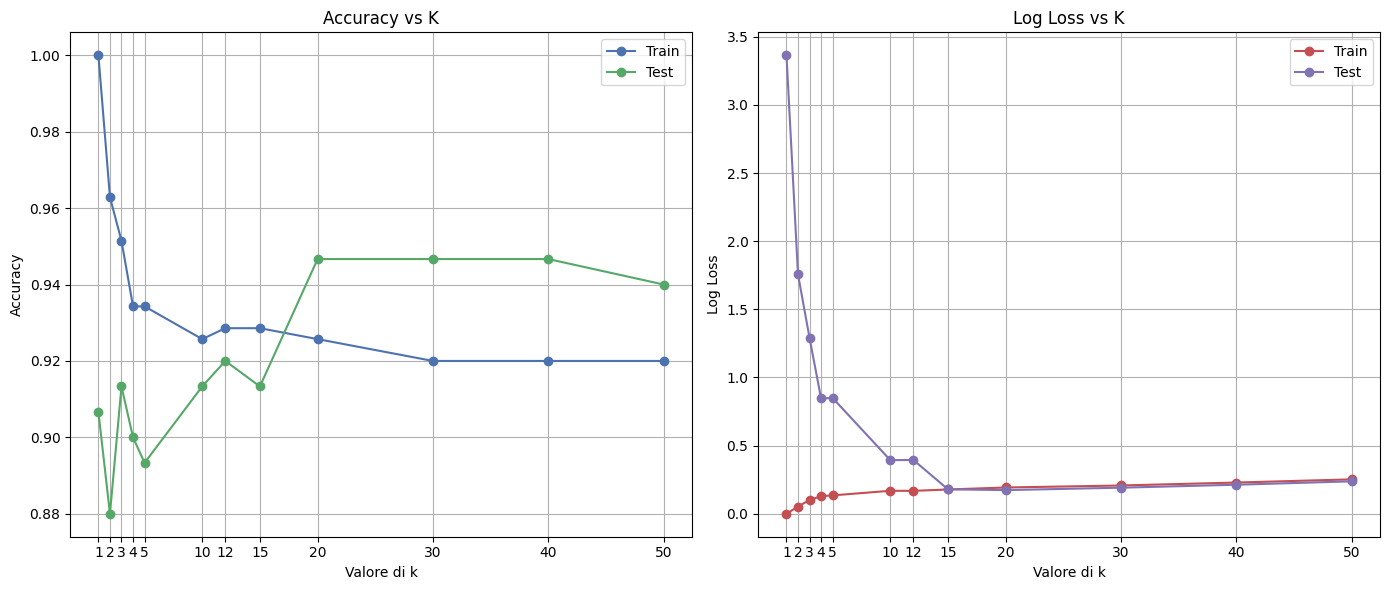

In [ ]:
#convertiamo i risultati in DataFrame
df_results = pd.DataFrame(results)

#visualizziamo i grafici
plt.figure(figsize=(14, 6))

#Accuracy vs K
plt.subplot(1, 2, 1)
plt.plot(df_results["k"], df_results["accuracy_train"], label="Train", marker="o", color="#4C72B0")
plt.plot(df_results["k"], df_results["accuracy_test"], label="Test", marker="o", color="#55A868")
plt.title("Accuracy vs K")
plt.xlabel("Valore di k")
plt.ylabel("Accuracy")
plt.xticks(df_results["k"])
plt.legend()
plt.grid(True)

#Log Loss vs K
plt.subplot(1, 2, 2)
plt.plot(df_results["k"], df_results["logloss_train"], label="Train", marker="o", color="#C44E52")
plt.plot(df_results["k"], df_results["logloss_test"], label="Test", marker="o", color="#8172B3")
plt.title("Log Loss vs K")
plt.xlabel("Valore di k")
plt.ylabel("Log Loss")
plt.xticks(df_results["k"])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


##<font color="#B8633C">Valutazione delle performance</font>

Per valutare le performance del modello, viene selezionato il valore ottimale di `k` identificato durante la fase di ottimizzazione.  
Viene creata una nuova istanza del classificatore KNN con questo valore di `k`, che viene addestrato sul training set e testato sul test set.

Le metriche calcolate includono:

* Accuracy: percentuale di osservazioni correttamente classificate sul test set.
* Classification Report: fornisce precision, recall e f1-score per ciascuna classe, utili per valutare in dettaglio le performance del modello per ogni tipologia di frutto.
* Confusion Matrix: mostra il numero di predizioni corrette e gli errori di classificazione per ciascuna classe.

La matrice ottenuta mostra che:

* La maggior parte delle osservazioni viene classificata correttamente: tutte le diagonali presentano i valori più alti.
* Mela e Uva sono le classi con il numero maggiore di predizioni corrette (rispettivamente 36 e 31).
* Sono presenti alcuni errori:
> * Kiwi è stato confuso 2 volte con Arancia e 1 volta con Mela.
> * Mela è stata confusa 2 volte con Arancia.
> * Arancia è stata confusa 2 volte, 1 con Kiwi e 1 con Mela.
> * Banana è stata classificata con alta precisione: nessun errore di confusione con altre classi.

Il modello mostra una buona capacità di generalizzazione, confermando l'efficacia del KNN con valore di `k` ottimale.


Valore ottimale di k: 20

Accuracy complessiva sul test set: 0.947

Classification Report:
              precision    recall  f1-score   support

     Arancia       0.86      0.92      0.89        26
      Banana       1.00      1.00      1.00        23
        Kiwi       0.93      0.90      0.92        31
        Mela       0.95      0.92      0.94        39
         Uva       1.00      1.00      1.00        31

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



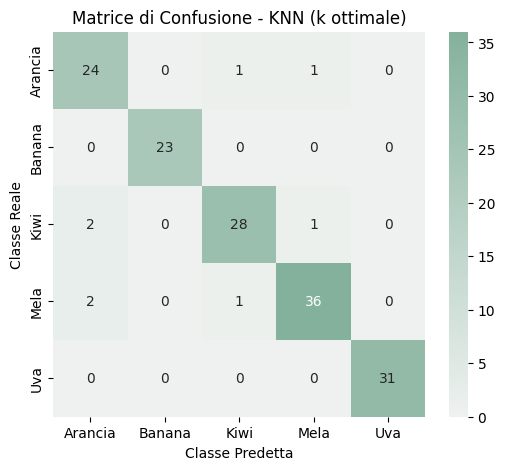

In [ ]:
#estraiamo il valore di k che ha ottenuto la massima accuracy sul test set
best_k = df_results.loc[df_results["accuracy_test"].idxmax(), "k"]
print(f"Valore ottimale di k: {int(best_k)}")

#istanziamo il classificatore con il valore ottimale di k
knn_best = KNeighborsClassifier(n_neighbors=int(best_k))

#addestriamo il modello con il training set
knn_best.fit(X_train_std, y_train)

#predizione delle classi sul test set
y_pred_final = knn_best.predict(X_test_std)

#predizione delle probabilità sul test set
y_proba_final = knn_best.predict_proba(X_test_std)

#calcoliamo l'accuracy complessiva
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"\nAccuracy complessiva sul test set: {accuracy_final:.3f}")

#calcoliamo il classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

#visualizziamo la confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#84B19C", as_cmap=True),
    xticklabels=knn_best.classes_,
    yticklabels=knn_best.classes_
)
plt.xlabel("Classe Predetta")
plt.ylabel("Classe Reale")
plt.title("Matrice di Confusione - KNN (k ottimale)")
plt.show()

#<font color="#B8633C">Conclusioni e analisi dei risultati</font>

I grafici delle performance in funzione del parametro `k` (accuracy e log loss) hanno permesso di identificare il valore ottimale di `k=20`, che massimizza l'accuracy sul test set mantenendo una log loss contenuta.

La confusion matrix conferma una classificazione accurata e ben generalizzata per tutte le classi di frutti, con un numero limitato di errori e ottimi valori di precision e recall, in particolare per le classi Mela, Uva e Banana.

Questi risultati suggeriscono che l’algoritmo K-Nearest Neighbors, supportato da una corretta standardizzazione delle feature e un’adeguata ottimizzazione del parametro `k`, rappresenta una soluzione efficace per la classificazione automatica dei frutti esotici.

Considerando la struttura semplice e ben bilanciata del dataset, le performance elevate risultano coerenti con la qualità dei dati disponibili.
Tuttavia, per consolidare ulteriormente l’affidabilità del modello, potrebbe essere utile confrontarne le prestazioni con modelli più complessi (es. SVM, Random Forest) o introdurre tecniche di feature selection e cross validation su diverse suddivisioni del dataset.